In [1]:
%matplotlib widget
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import bison

# plt.rcParams.update({
#     "text.usetex"      : True,
#     "font.family"      : "Helvetica",
#     "mathtext.fontset" : "dejavuserif"
# })
plt.rcParams.update({
    "axes.axisbelow"   : True,
})

In [3]:
#data = bison.load("WF_beta596_lat24^3x48_Ntherm500_Ntraj1_seed12345.dat")
#data = bison.load("WF_beta596_lat24^3x48_Ntherm500_Ntraj1_seed62345.dat")
data = bison.load("WF_beta617_lat32^3x64_Ntherm200_seed223456.dat")
print(data.keys())
print(data["History & Measurments"].keys())

[Bison] : Reading file WF_beta617_lat32^3x64_Ntherm200_seed223456.dat
[Bison] : File created by gmorandi at ampere on Tue Dec 12 22:00:36 2023
[Bison] : Read 0.00514889 MB at 2.79995 MB/s
dict_keys(['beta coupling', 'Lattice size: L1', 'Lattice size: L2', 'Lattice size: L3', 'Lattice size: T', 'Lattice volume', 'Number of steps of OMF4 integrator', 'Length of each MD trajectory', 'Thermalization trajectories', 'History & Measurments'])
dict_keys(['MC History', 'Plaquette'])


In [11]:
##############################
### General run parameters ###
##############################
beta      =  data['beta coupling']
L1        =  data['Lattice size: L1']
L2        =  data['Lattice size: L2']
L3        =  data['Lattice size: L3']
T         =  data['Lattice size: T']
V         =  data['Lattice volume']
Ntherm    =  data['Thermalization trajectories']
# Ntraj     =  data['MD trajectories']
Ns        =  data['Number of steps of OMF4 integrator']
tau       =  data['Length of each MD trajectory']

print(f"\n Lattice                =  [{L1}x{L2}x{L3}x{T}]")
print(f" Lattice volume         =  {V}")
print(f" beta                   =  {beta}")
print(f" Steps of OMF4          =  {Ns}")
print(f" tau MD                 =  {tau}")
# print(f" MD trajectories        =  {Ntraj}")
print(f" Therm. trajectories    =  {Ntherm}\n")

########################################################
### Loading history run and observables measurements ###
########################################################
Acc = data["History & Measurments"]["MC History"][:, 0]
dH  = data["History & Measurments"]["MC History"][:, 1]
# S   = data["History & Measurments"]["Action"]
P   = data["History & Measurments"]["Plaquette"]


after = 100
print(f"\n Acceptance rate        =  {np.mean(Acc[after-1:-1]):.2f}")
print(f" < |dH| >               =  {np.mean(np.abs(dH[after-1:-1])):.2e}")
# print(f" < S >                  =  {np.mean(S[after-1:-1]):.5f}")
print(f" < Plaq >               =  {np.mean(P[after-1:-1]):.5f}\n")


 Lattice                =  [32x32x32x64]
 Lattice volume         =  2097152
 beta                   =  6.17
 Steps of OMF4          =  8
 tau MD                 =  2.0
 Therm. trajectories    =  200


 Acceptance rate        =  0.95
 < |dH| >               =  1.10e-01
 < Plaq >               =  0.61078



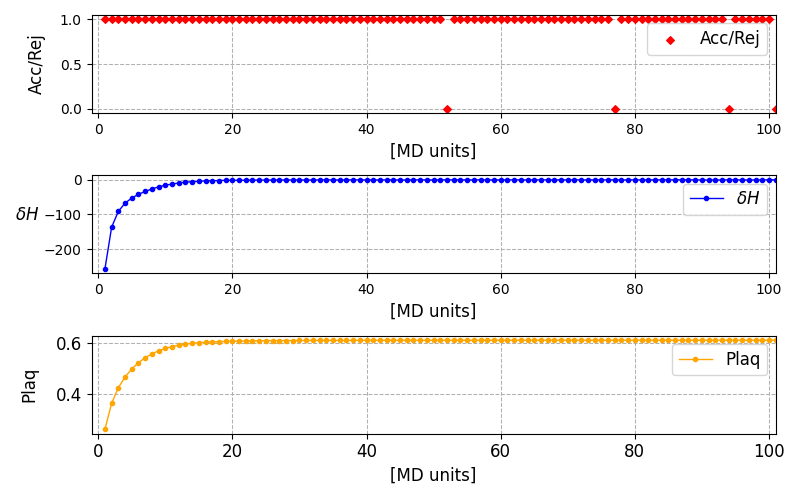

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(8, 5))

plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.12)
plt.subplots_adjust(left   = 0.13)
plt.subplots_adjust(right  = 0.96)
fsize = 12

#plt.title(r'Thermalization of the Plaquette', pad=15, fontsize=fsize)

ax[0].grid(linestyle = '--', linewidth = 0.75)
ax[0].scatter(range(1, Ntherm + 1), Acc, color='red', \
        marker='D', s=15.0, label=r'Acc/Rej')
ax[0].set_xlabel(rf'[MD units]', fontsize=fsize)
ax[0].set_ylabel(f'Acc/Rej', rotation=90, labelpad=10, fontsize=fsize)
ax[0].set_xlim([-1, after+1])
ax[0].legend(loc='best', fontsize=fsize)

ax[1].grid(linestyle = '--', linewidth = 0.75)
ax[1].plot(range(1, Ntherm + 1), dH, color='blue', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=3.0,   label=r'$\delta H$')
ax[1].set_xlabel(rf'[MD units]', fontsize=fsize)
ax[1].set_ylabel(r'$\delta H$', rotation=0, labelpad=12, fontsize=fsize)
ax[1].set_xlim([-1, after+1])
ax[1].legend(loc='best', fontsize=fsize)

ax[2].grid(linestyle = '--', linewidth = 0.75)
ax[2].plot(range(1, Ntherm + 1), P, color='orange', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=3.0,   label=r'Plaq')
ax[2].set_xlabel(rf'[MD units]', fontsize=fsize)
ax[2].set_ylabel(r'Plaq', rotation=90, labelpad=12, fontsize=fsize)
ax[2].set_xlim([-1, after+1])
ax[2].legend(loc='best', fontsize=fsize)




plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)

fig.tight_layout()
